In [3]:
# Customer Churn Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [5]:
# Step 2: Load Dataset
# Replace 'churn.csv' with your dataset (download from Google Sheets)
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\Data_file - data_file_Project B.csv")

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingM

Churn
No     5174
Yes    1869
Name: count, dtype: int64


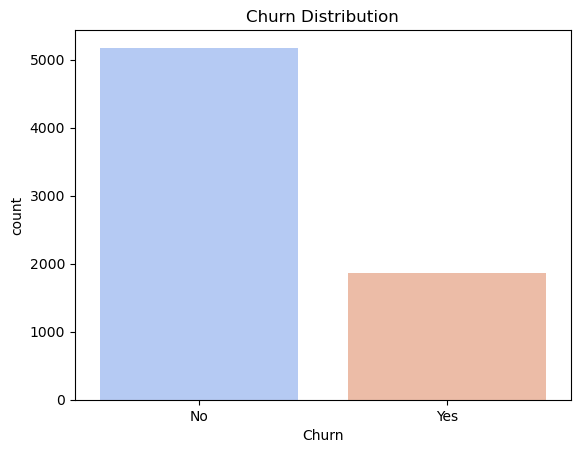

In [9]:
# Step 3: EDA
print(df["Churn"].value_counts())
sns.countplot(x="Churn", data=df, hue="Churn", palette="coolwarm", legend=False)
plt.title("Churn Distribution")
plt.show()

In [15]:
df = df.dropna()

In [19]:
from sklearn.impute import SimpleImputer

# Step 4: Data Preprocessing
# Encode categorical variables
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [21]:
# Step 5: Model Development
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


--- Logistic Regression ---
Accuracy: 0.7867803837953091
Precision: 0.625
Recall: 0.4946524064171123
F1 Score: 0.5522388059701493

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



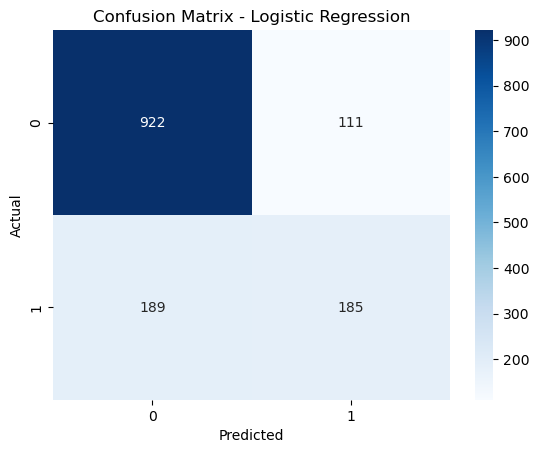


--- Random Forest ---
Accuracy: 0.7860696517412935
Precision: 0.6356877323420075
Recall: 0.4572192513368984
F1 Score: 0.5318818040435459

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



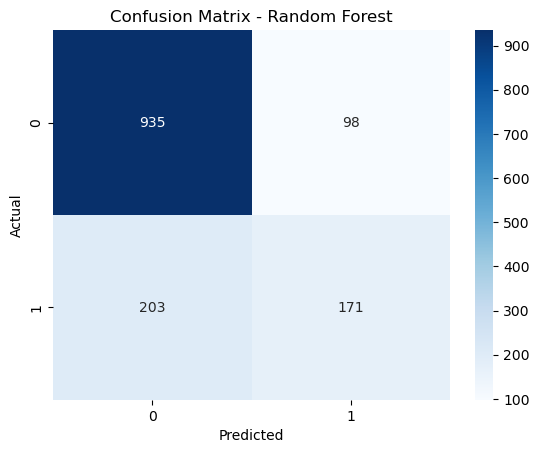

In [23]:
# Step 6: Model Evaluation
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

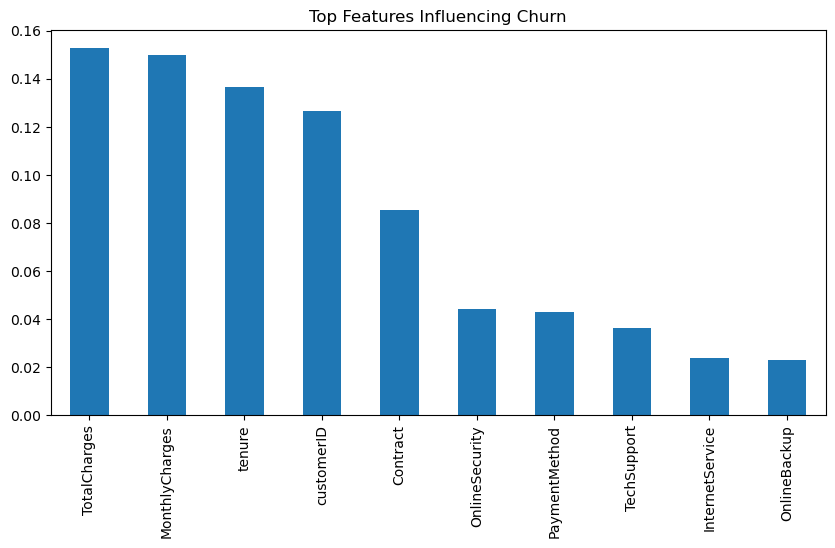

In [25]:
#Step 7: Insights - Feature Importance (Random Forest)
feature_importances = pd.Series(rf.feature_importances_, index=df.drop("Churn", axis=1).columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10,5), title="Top Features Influencing Churn")
plt.show()